# MLP
Cell line 14 K562

This notebook uses
lncRNA, canonical, no middle-exclusion, GMM, learning module.

There was a learn fail during CV.

MCC mean 0.3106

In [1]:
SEED = 43
import tensorflow as tf
tf.random.set_seed(SEED) 
tf.keras.backend.set_floatx('float32')
import numpy as np
np.random.seed(SEED) 
from datetime import datetime
print(datetime.now())

2023-04-28 17:43:32.827394


In [2]:
import sys
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print('GPU device not found')
else:
    print('Found GPU at: {}'.format(device_name))

try:
    from google.colab import drive
    IN_COLAB = True
    print('Running on CoLab')
    PATH='/content/drive/'
    drive.mount(PATH)
    DATA_DIR=PATH+'My Drive/data/Localization/TrainTest/TrainTest_ver43/'  # must end in "/"
    MODEL_DIR=PATH+'My Drive/data/Localization/Models/'  # must end in "/"
    sys.path.append('/content/drive/My Drive/Colab Notebooks')
except:
    IN_COLAB = False
    DATA_DIR="/"
    MODEL_DIR="/"
print(DATA_DIR)
SAVE_MODEL_FILENAME = None # 'MLP'
SAVE_DESCRIM_FILENAME = None # 'GMM'
LOAD_MODEL_FILENAME = None # 'MLP.0.0..model'
LOAD_DESCRIM_FILENAME = None # 'GMM.0.0.pickle'

GPU device not found
Running on CoLab
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/


In [3]:
from platform import python_version
print('Python',python_version())
import pandas as pd
import scipy.stats as ss
import pickle
import time # sleep function
from os.path import isfile
from matplotlib import pyplot as plt 
import sklearn   # pip install --upgrade scikit-learn
print('sklearn',sklearn.__version__)

from learning import DataLoader, CrossValidator, Separator, ModelBuilder

K=5
ALPHABET=4**K + 1
EPOCHS=300 
EMBED_DIMEN = 4 # arbitrary hyperparameter
RCI_THRESHOLD_MECHANISM = 'RCI_GMM'  # 'RCI_GMM' 'ZERO' 'THE_MEAN'
RCI_THRESHOLD_VALUE = -1  # use -1 for lncRNA, use 0 for mRNA
BREAK = False   # optionally break after first fold
FILTER_TRAIN        = False
FILTER_TAILS_TRAIN  = False
FILTER_MIDDLE_TRAIN = False
FILTER_TEST         = False
FILTER_TAILS_TEST   = False
FILTER_MIDDLE_TEST  = False
MIDDLE_LOW          = -2   # -2 for lncRNA, -1 for mRNA
MIDDLE_HIGH         = 0    #  0 for lncRNA, +1 for mRNA

REPEATS = 2
FOLDS = 5

Python 3.10.11
sklearn 1.2.2


In [4]:
RCI_FILE_TRAIN = 'train.lncRNA_RCI.all_cell_lines.csv'
RCI_FILE_TEST  = None # 'test.lncRNA_RCI.all_cell_lines.csv'

SEQ_FILE_TRAIN = 'train.canon_lncRNA_transcripts.csv'
SEQ_FILE_TEST  = None # 'test.canon_lncRNA_transcripts.csv'

In [5]:
def get_ordered_list():
    ordered_list = \
    ['A549','H1.hESC','HeLa.S3','HepG2','HT1080',\
      'HUVEC','MCF.7','NCI.H460','NHEK','SK.MEL.5',\
      'SK.N.DZ','SK.N.SH','GM12878','K562','IMR.90']
    return ordered_list
all_cell_lines = get_ordered_list()
EXCLUSIONS = [x for x in range(15) if x!=13]   
print('Exclusions',EXCLUSIONS)

Exclusions [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


2023-04-28 17:43:35.306718
Load RCI from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.lncRNA_RCI.all_cell_lines.csv
Number of RCI values loaded 441
Num RCI: 441
Load sequence from /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/train.canon_lncRNA_transcripts.csv
Loaded 441 sequences.

Training # 1 1
2023-04-28 17:43:37.591741
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.1.validation_genes.txt
Discriminator is GMM
Means [-2.63411804077769, 0.5585074568195904]
Variances [3.47674223 1.46919005]
Priors [0.37957452 0.62042548]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 233:115 66.95%
Computed class weights: {0: 1.5130434782608695, 1: 0.7467811158798283}
Valid 1:0 54:39 58.06%
FIT


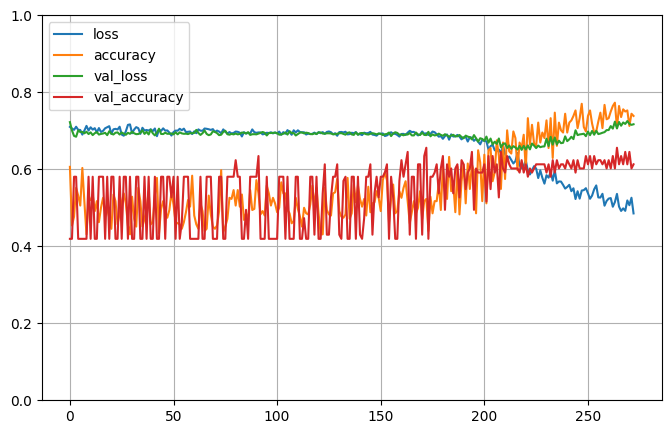


Testing # 1 1
2023-04-28 17:44:25.890045
PREDICT
Test 1:0 54:39 58.06%
Predict 1:0 76:17 81.72%
Test sizes (93, 1025) (93,)
Distrib of scores: 0.5059363 mean 0.005371385 std
Range of scores: 0.49524304 to 0.51917726
Score threshold 0.5
Confusion matrix
 [[12 27]
 [ 5 49]]
Normalized matrix
 [[0.12903226 0.29032258]
 [0.05376344 0.52688172]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


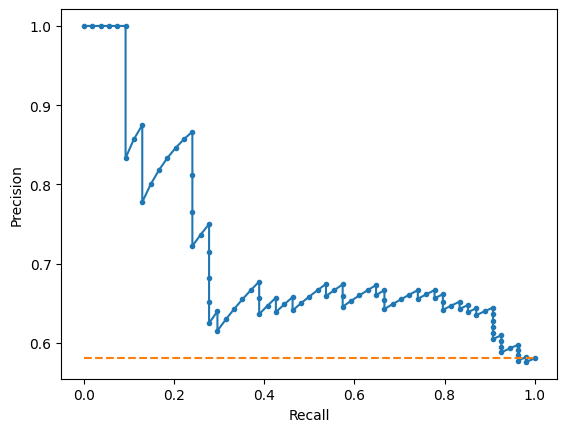

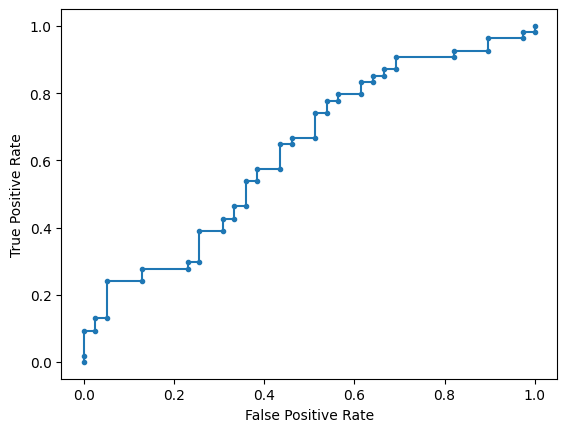

Accuracy: 65.59% Precision: 64.47% Recall: 90.74%
F1: 75.38% MCC: 0.2746
AUPRC: 70.94% AUROC: 62.92%
 accuracy [65.59139784946237]
 precision [64.47368421052632]
 recall [90.74074074074075]
 F1 [75.38461538461537]
 MCC [0.27462354043850756]
 AUPRC [70.94102079444092]
 AUROC [62.91547958214625]

Training # 1 2
2023-04-28 17:44:26.500618
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.2.validation_genes.txt
Discriminator is GMM
Means [-2.717728242240844, 0.5243892143435377]
Variances [2.53589381 1.42739134]
Priors [0.38608743 0.61391257]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 227:123 64.86%
Computed class weights: {0: 1.4227642276422765, 1: 0.7709251101321586}
Valid 1:0 59:32 64.84%
FIT


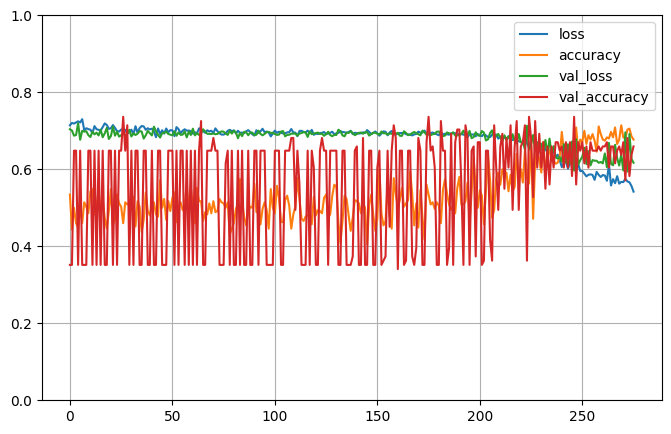


Testing # 1 2
2023-04-28 17:45:09.493913
PREDICT
Test 1:0 59:32 64.84%
Predict 1:0 73:18 80.22%
Test sizes (91, 1025) (91,)
Distrib of scores: 0.50208485 mean 0.0022682026 std
Range of scores: 0.4972147 to 0.50850105
Score threshold 0.5
Confusion matrix
 [[13 19]
 [ 5 54]]
Normalized matrix
 [[0.14285714 0.20879121]
 [0.05494505 0.59340659]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


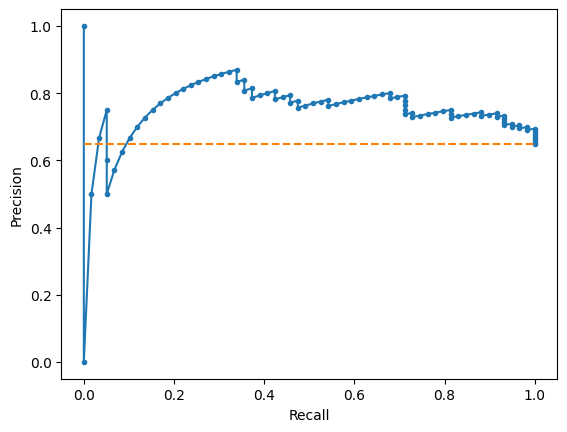

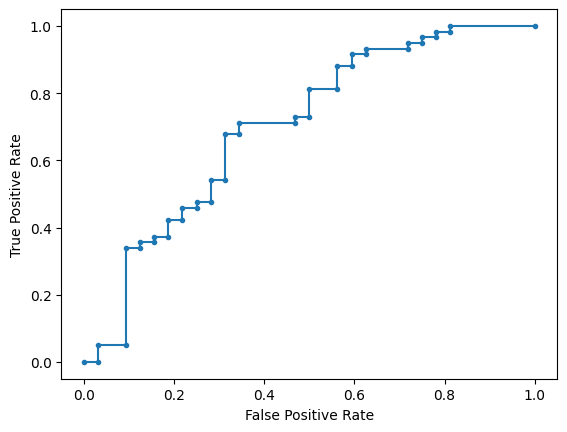

Accuracy: 73.63% Precision: 73.97% Recall: 91.53%
F1: 81.82% MCC: 0.3854
AUPRC: 74.88% AUROC: 70.13%
 accuracy [73.62637362637363]
 precision [73.97260273972603]
 recall [91.52542372881356]
 F1 [81.8181818181818]
 MCC [0.385380746354175]
 AUPRC [74.88241552475614]
 AUROC [70.12711864406779]

Training # 1 3
2023-04-28 17:45:10.063107
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.3.validation_genes.txt
Discriminator is GMM
Means [0.6316052011578442, -2.6208451918813767]
Variances [1.42984643 3.50975702]
Priors [0.58541008 0.41458992]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 222:139 61.50%
Computed class weights: {0: 1.2985611510791366, 1: 0.8130630630630631}
Valid 1:0 51:29 63.75%
FIT


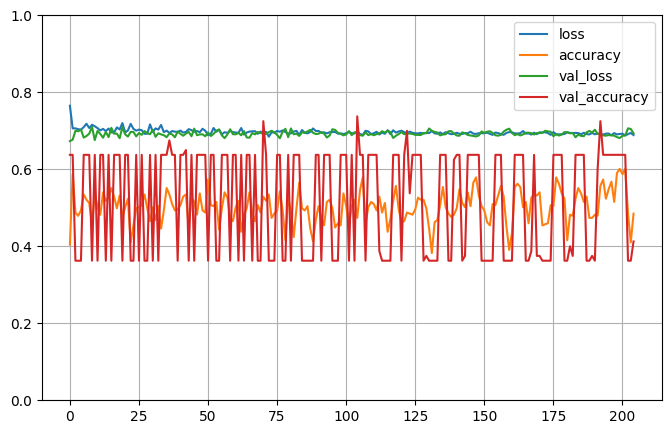


Testing # 1 3
2023-04-28 17:45:53.390851
PREDICT
Test 1:0 51:29 63.75%
Predict 1:0 66:14 82.50%
Test sizes (80, 1025) (80,)
Distrib of scores: 0.5003635 mean 0.00039193654 std
Range of scores: 0.49958634 to 0.5018696
Score threshold 0.5
Confusion matrix
 [[11 18]
 [ 3 48]]
Normalized matrix
 [[0.1375 0.225 ]
 [0.0375 0.6   ]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


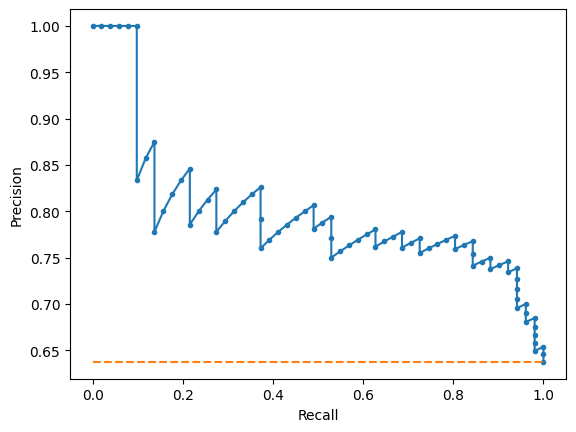

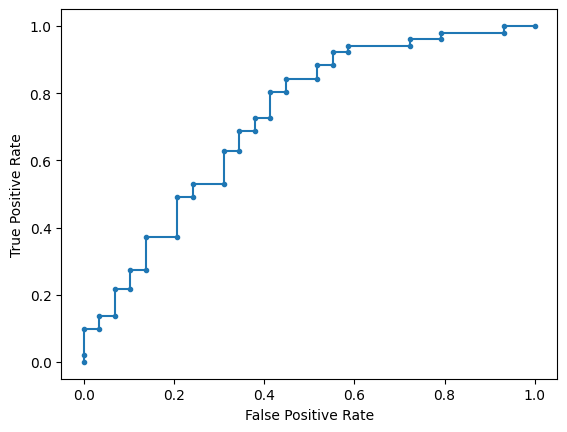

Accuracy: 73.75% Precision: 72.73% Recall: 94.12%
F1: 82.05% MCC: 0.4055
AUPRC: 79.80% AUROC: 72.28%
 accuracy [73.75]
 precision [72.72727272727273]
 recall [94.11764705882352]
 F1 [82.05128205128204]
 MCC [0.4054695723995605]
 AUPRC [79.7964009758434]
 AUROC [72.27856659905342]

Training # 1 4
2023-04-28 17:45:53.942606
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.4.validation_genes.txt
Discriminator is GMM
Means [-2.8652184346349343, 0.409028012902644]
Variances [3.235395   1.51805034]
Priors [0.36104392 0.63895608]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 1 1 1 1 1 1 1 1 1]
Train 1:0 235:109 68.31%
Computed class weights: {0: 1.5779816513761469, 1: 0.7319148936170212}
Valid 1:0 67:30 69.07%
FIT


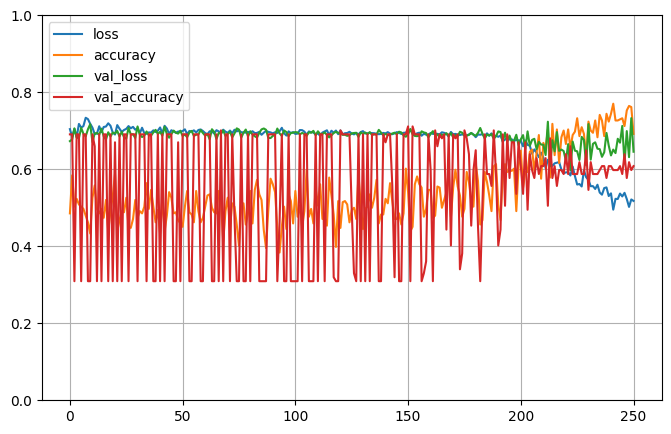


Testing # 1 4
2023-04-28 17:46:22.196242
PREDICT
Test 1:0 67:30 69.07%
Predict 1:0 93:4 95.88%
Test sizes (97, 1025) (97,)
Distrib of scores: 0.5022573 mean 0.0014355446 std
Range of scores: 0.49977797 to 0.5063574
Score threshold 0.5
Confusion matrix
 [[ 3 27]
 [ 1 66]]
Normalized matrix
 [[0.03092784 0.27835052]
 [0.01030928 0.68041237]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


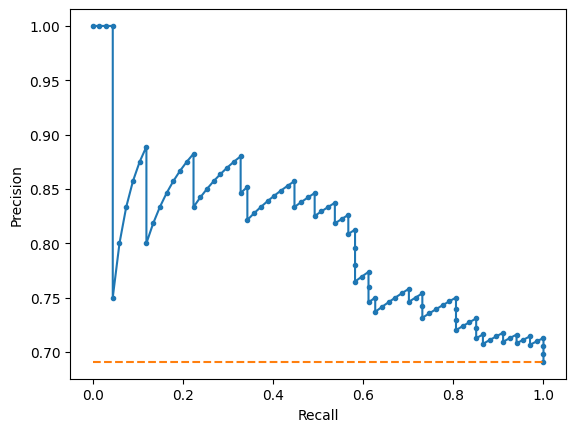

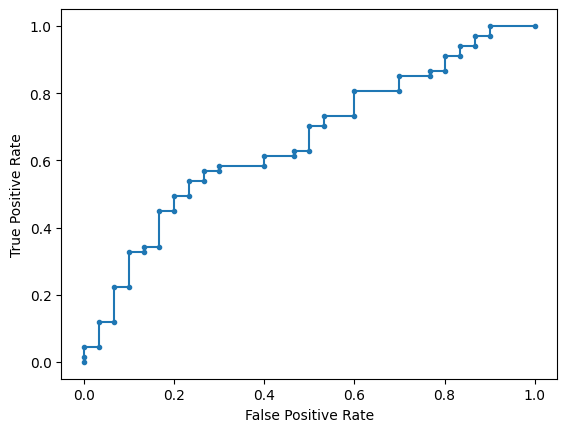

Accuracy: 71.13% Precision: 70.97% Recall: 98.51%
F1: 82.50% MCC: 0.1978
AUPRC: 80.39% AUROC: 65.57%
 accuracy [71.1340206185567]
 precision [70.96774193548387]
 recall [98.50746268656717]
 F1 [82.5]
 MCC [0.19775460786082275]
 AUPRC [80.39133371968776]
 AUROC [65.57213930348257]

Training # 1 5
2023-04-28 17:46:22.814715
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.1.5.validation_genes.txt
Discriminator is GMM
Means [0.6387406958166012, -2.487741611222976]
Variances [1.33100701 3.36592589]
Priors [0.56483234 0.43516766]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 214:147 59.28%
Computed class weights: {0: 1.227891156462585, 1: 0.8434579439252337}
Valid 1:0 53:27 66.25%
FIT


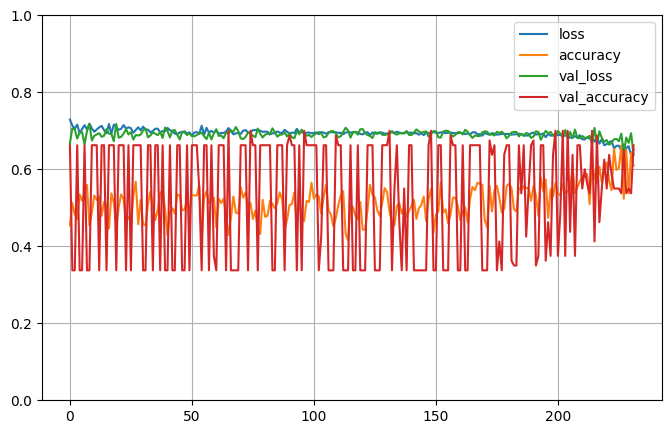


Testing # 1 5
2023-04-28 17:47:08.359987
PREDICT
Test 1:0 53:27 66.25%
Predict 1:0 77:3 96.25%
Test sizes (80, 1025) (80,)
Distrib of scores: 0.5011388 mean 0.00065340183 std
Range of scores: 0.4996585 to 0.5029625
Score threshold 0.5
Confusion matrix
 [[ 3 24]
 [ 0 53]]
Normalized matrix
 [[0.0375 0.3   ]
 [0.     0.6625]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


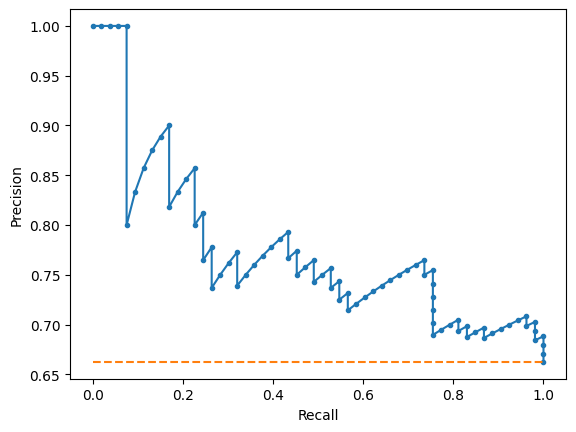

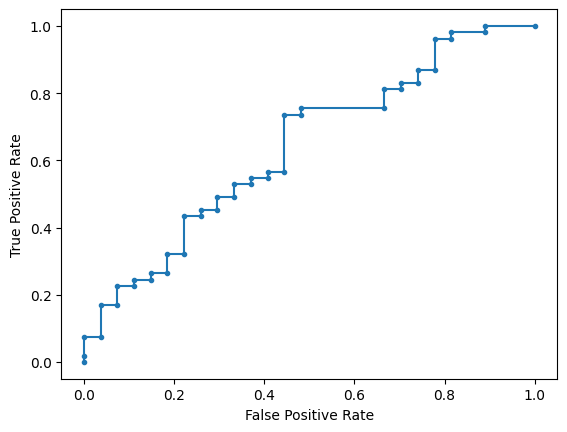

Accuracy: 70.00% Precision: 68.83% Recall: 100.00%
F1: 81.54% MCC: 0.2765
AUPRC: 77.36% AUROC: 63.94%
 accuracy [70.0]
 precision [68.83116883116884]
 recall [100.0]
 F1 [81.53846153846155]
 MCC [0.2765485065573063]
 AUPRC [77.35609738189952]
 AUROC [63.941299790356396]

Training # 2 1
2023-04-28 17:47:08.909040
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.1.validation_genes.txt
Discriminator is GMM
Means [-2.5678109585575766, 0.5734610253045949]
Variances [3.27656158 1.40925418]
Priors [0.41724837 0.58275163]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 219:137 61.52%
Computed class weights: {0: 1.2992700729927007, 1: 0.8127853881278538}
Valid 1:0 55:30 64.71%
FIT


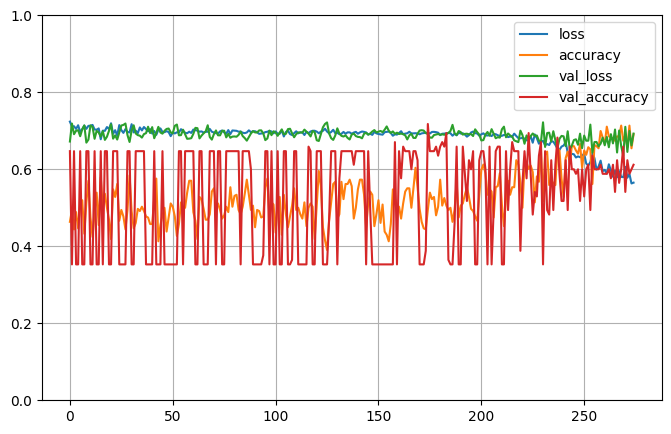


Testing # 2 1
2023-04-28 17:47:51.915829
PREDICT
Test 1:0 55:30 64.71%
Predict 1:0 61:24 71.76%
Test sizes (85, 1025) (85,)
Distrib of scores: 0.50146115 mean 0.0018384196 std
Range of scores: 0.4976614 to 0.50561917
Score threshold 0.5
Confusion matrix
 [[15 15]
 [ 9 46]]
Normalized matrix
 [[0.17647059 0.17647059]
 [0.10588235 0.54117647]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


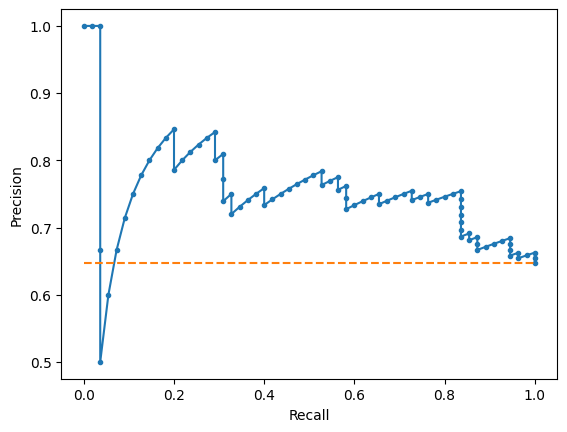

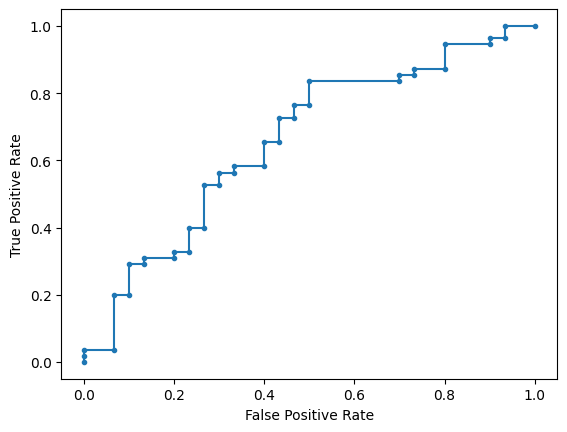

Accuracy: 71.76% Precision: 75.41% Recall: 83.64%
F1: 79.31% MCC: 0.3571
AUPRC: 75.10% AUROC: 65.76%
 accuracy [71.76470588235294]
 precision [75.40983606557377]
 recall [83.63636363636363]
 F1 [79.31034482758619]
 MCC [0.35709228937300963]
 AUPRC [75.1038160855118]
 AUROC [65.75757575757575]

Training # 2 2
2023-04-28 17:47:52.491518
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.2.validation_genes.txt
Discriminator is GMM
Means [-2.5664409288812995, 0.5686141777802556]
Variances [3.04077848 1.47950125]
Priors [0.39237606 0.60762394]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 229:125 64.69%
Computed class weights: {0: 1.416, 1: 0.7729257641921398}
Valid 1:0 52:35 59.77%
FIT


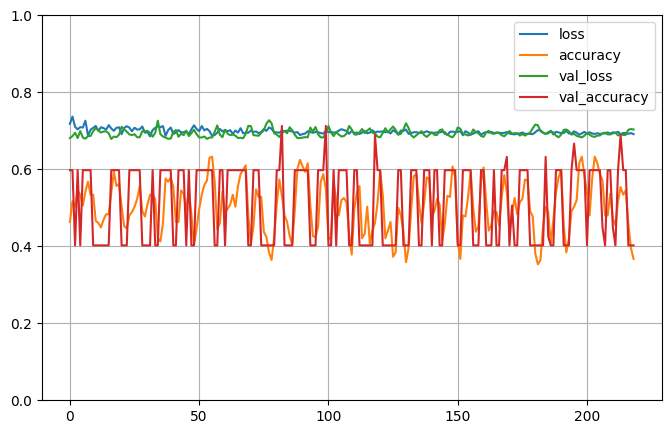


Testing # 2 2
2023-04-28 17:48:35.511844
PREDICT
Test 1:0 52:35 59.77%
Predict 1:0 73:14 83.91%
Test sizes (87, 1025) (87,)
Distrib of scores: 0.50044256 mean 0.00046242448 std
Range of scores: 0.49955258 to 0.50213486
Score threshold 0.5
Confusion matrix
 [[11 24]
 [ 3 49]]
Normalized matrix
 [[0.12643678 0.27586207]
 [0.03448276 0.56321839]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


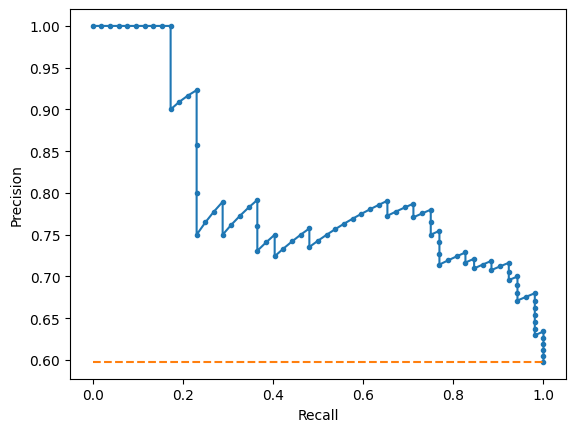

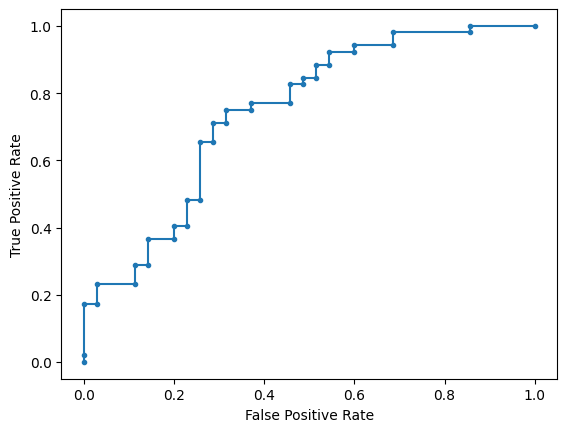

Accuracy: 68.97% Precision: 67.12% Recall: 94.23%
F1: 78.40% MCC: 0.3424
AUPRC: 79.87% AUROC: 74.45%
 accuracy [68.96551724137932]
 precision [67.12328767123287]
 recall [94.23076923076923]
 F1 [78.4]
 MCC [0.3424173316878626]
 AUPRC [79.8699066914528]
 AUROC [74.45054945054946]

Training # 2 3
2023-04-28 17:48:36.070490
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.3.validation_genes.txt
Discriminator is GMM
Means [-2.69764608147578, 0.4800918686461775]
Variances [3.24368989 1.5414928 ]
Priors [0.39777531 0.60222469]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 229:130 63.79%
Computed class weights: {0: 1.3807692307692307, 1: 0.7838427947598253}
Valid 1:0 59:23 71.95%
FIT


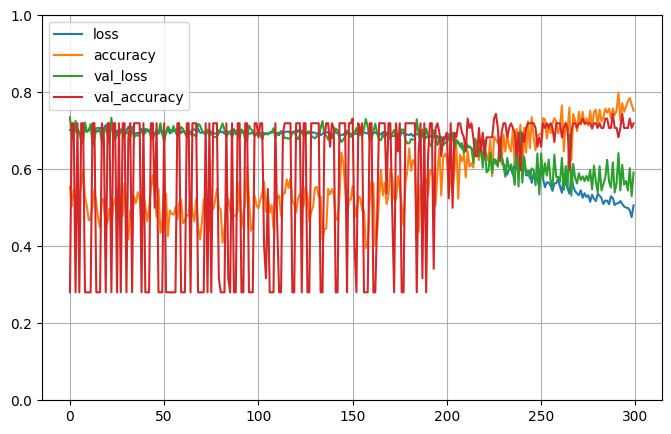


Testing # 2 3
2023-04-28 17:49:21.853375
PREDICT
Test 1:0 59:23 71.95%
Predict 1:0 52:30 63.41%
Test sizes (82, 1025) (82,)
Distrib of scores: 0.55746806 mean 0.24166977 std
Range of scores: 0.085300855 to 0.96318454
Score threshold 0.5
Confusion matrix
 [[15  8]
 [15 44]]
Normalized matrix
 [[0.18292683 0.09756098]
 [0.18292683 0.53658537]]
Extreme scores correct, pos:neg 30 11
Extreme scores incorrect pos:neg 5 12


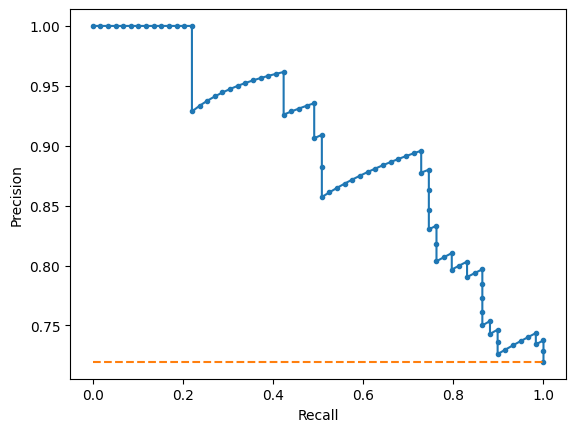

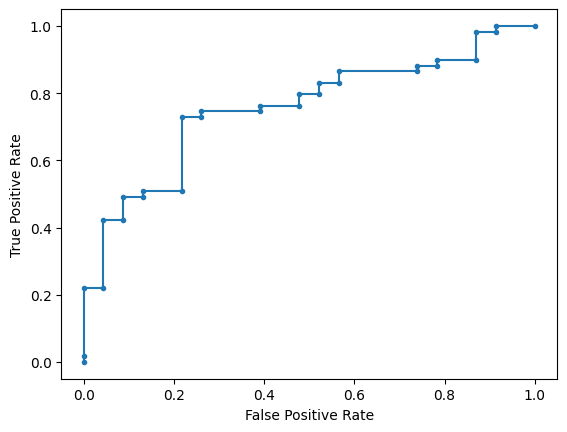

Accuracy: 71.95% Precision: 84.62% Recall: 74.58%
F1: 79.28% MCC: 0.3711
AUPRC: 89.58% AUROC: 75.61%
 accuracy [71.95121951219512]
 precision [84.61538461538461]
 recall [74.57627118644068]
 F1 [79.2792792792793]
 MCC [0.3711432246954602]
 AUPRC [89.57889417535303]
 AUROC [75.60795873249816]

Training # 2 4
2023-04-28 17:49:22.421808
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.4.validation_genes.txt
Discriminator is GMM
Means [0.5233140887746122, -2.7467204847898126]
Variances [1.4601074  3.41915731]
Priors [0.63305468 0.36694532]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 228:108 67.86%
Computed class weights: {0: 1.5555555555555556, 1: 0.7368421052631579}
Valid 1:0 63:42 60.00%
FIT


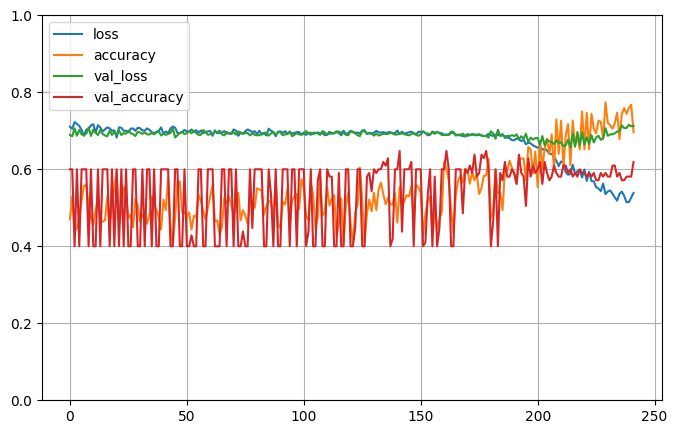


Testing # 2 4
2023-04-28 17:49:51.257669
PREDICT
Test 1:0 63:42 60.00%
Predict 1:0 98:7 93.33%
Test sizes (105, 1025) (105,)
Distrib of scores: 0.5023178 mean 0.0015418337 std
Range of scores: 0.4992251 to 0.5058929
Score threshold 0.5
Confusion matrix
 [[ 6 36]
 [ 1 62]]
Normalized matrix
 [[0.05714286 0.34285714]
 [0.00952381 0.59047619]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


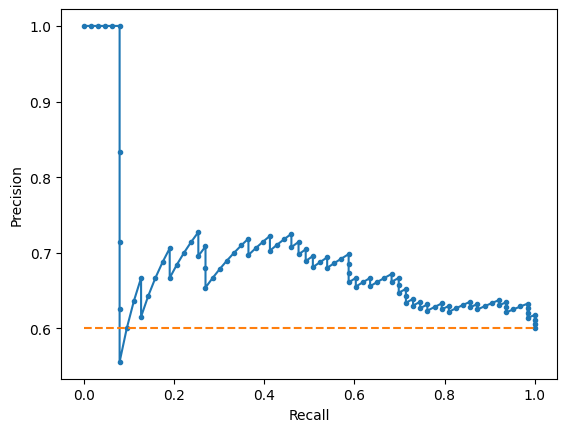

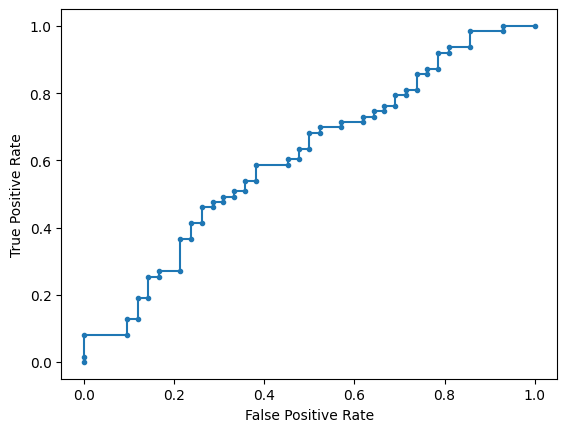

Accuracy: 64.76% Precision: 63.27% Recall: 98.41%
F1: 77.02% MCC: 0.2494
AUPRC: 69.15% AUROC: 60.73%
 accuracy [64.76190476190476]
 precision [63.26530612244898]
 recall [98.4126984126984]
 F1 [77.01863354037266]
 MCC [0.24939187455541986]
 AUPRC [69.14898759722317]
 AUROC [60.73318216175358]

Training # 2 5
2023-04-28 17:49:51.816155
Opening file /content/drive/My Drive/data/Localization/TrainTest/TrainTest_ver43/cv.2.5.validation_genes.txt
Discriminator is GMM
Means [0.6302053607250955, -2.658795181231708]
Variances [1.30186567 3.2985036 ]
Priors [0.5866404 0.4133596]
[-5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 3]
[0 0 0 0 0 0 0 1 1 1 1 1 1 1 1]
Train 1:0 219:140 61.00%
Computed class weights: {0: 1.2821428571428573, 1: 0.819634703196347}
Valid 1:0 51:31 62.20%
FIT


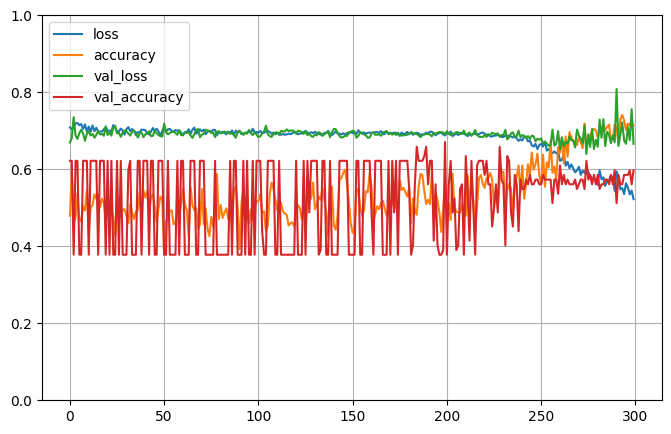


Testing # 2 5
2023-04-28 17:50:34.852434
PREDICT
Test 1:0 51:31 62.20%
Predict 1:0 70:12 85.37%
Test sizes (82, 1025) (82,)
Distrib of scores: 0.5026995 mean 0.0026714108 std
Range of scores: 0.49788648 to 0.5111015
Score threshold 0.5
Confusion matrix
 [[ 8 23]
 [ 4 47]]
Normalized matrix
 [[0.09756098 0.2804878 ]
 [0.04878049 0.57317073]]
Extreme scores correct, pos:neg 0 0
Extreme scores incorrect pos:neg 0 0


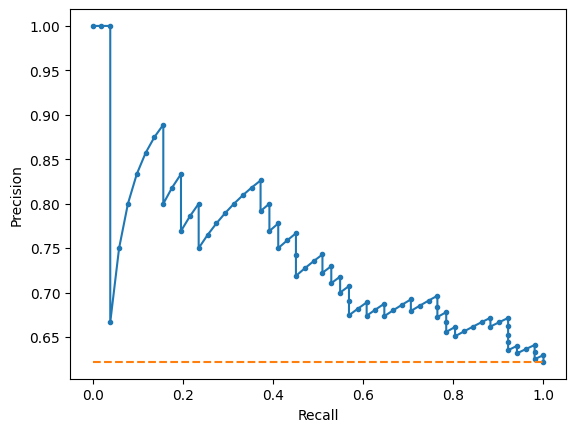

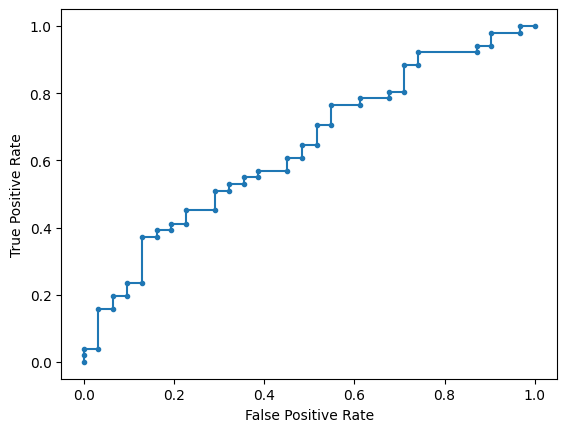

Accuracy: 67.07% Precision: 67.14% Recall: 92.16%
F1: 77.69% MCC: 0.2464
AUPRC: 74.04% AUROC: 63.76%
 accuracy [67.07317073170732]
 precision [67.14285714285714]
 recall [92.15686274509804]
 F1 [77.68595041322314]
 MCC [0.24644088631653732]
 AUPRC [74.03526440233972]
 AUROC [63.75711574952562]
2023-04-28 17:50:35.432504


In [6]:
print(datetime.now())

accuracy=[]
precision=[]
recall=[]
f1=[]
mcc=[]
auprc=[]
auroc=[]

loader = DataLoader(K,ALPHABET)
filepath = DATA_DIR+RCI_FILE_TRAIN
print("Load RCI from",filepath)
gene_to_rci = loader.load_gene_rci_values(filepath,EXCLUSIONS)
print('Num RCI:', len(gene_to_rci.keys()))
filepath = DATA_DIR+SEQ_FILE_TRAIN
print('Load sequence from',filepath)
allids,allseq = loader.load_spectra(filepath)  # for MLP (load_sequence() for CNN)
print('Loaded',len(allseq),'sequences.')
test_gene_to_rci = None
test_allids = None
test_allseq = None
if SEQ_FILE_TEST is not None:
    # Train on the entire train set (no cross-validation).
    # Evaluate with the test files.
    test_loader = DataLoader(K,ALPHABET)
    filepath = DATA_DIR+RCI_FILE_TEST
    print("Load RCI from",filepath)
    test_gene_to_rci = test_loader.load_gene_rci_values(filepath,EXCLUSIONS)
    print('Num RCI:', len(test_gene_to_rci.keys()))
    filepath = DATA_DIR+SEQ_FILE_TEST
    print('Load sequence from',filepath)
    test_allids,test_allseq = test_loader.load_spectra(filepath)
    print('Loaded',len(test_allseq),'sequences.')

for repeat in range(REPEATS):
    for fold in range(FOLDS):
        show_r = repeat+1  # display one-based counting
        show_f = fold+1    # display one-based counting

        print()
        print("Training #",show_r,show_f)
        print(datetime.now())
        builder = ModelBuilder(ALPHABET)
        cvdo = CrossValidator(EPOCHS,RCI_THRESHOLD_VALUE)
        cvdo.set_model_builder(builder)
        cvdo.set_threshold_mechanism(RCI_THRESHOLD_MECHANISM)
        if SEQ_FILE_TEST is None:
            # Train on 80% and evaluate on 20%.
            separator = Separator()
            separator.set_middle(FILTER_TEST,FILTER_TAILS_TEST,FILTER_MIDDLE_TEST,\
                                 FILTER_TRAIN,FILTER_TAILS_TRAIN,FILTER_MIDDLE_TRAIN,\
                                 MIDDLE_LOW,MIDDLE_HIGH)
            separator.load(DATA_DIR,show_r,show_f)
            separator.process(allids,allseq,gene_to_rci)
            train_allids,test_allids = separator.get_ids()
            train_allseq,test_allseq = separator.get_seq()
            train_gene_to_rci,test_gene_to_rci = separator.get_rci()
            cvdo.train_new_model(
                train_allids,train_allseq,train_gene_to_rci,
                test_allids,test_allseq,test_gene_to_rci)
            if SAVE_MODEL_FILENAME is not None:
                filename1 = f"{SAVE_MODEL_FILENAME}.{show_r}.{show_f}.model"
                filename2 = f"{SAVE_DESCRIM_FILENAME}.{show_r}.{show_f}.pickle"
                cvdo.save_model(filename1,filename2)
        else:
            # Train on the entire train set (no cross-validation).
            # Evaluate with the test files.
            train_allids = allids
            train_allseq = allseq
            train_gene_to_rci = gene_to_rci
            BREAK = True
            filename1 = LOAD_MODEL_FILENAME
            filename2 = LOAD_DESCRIM_FILENAME
            cvdo.load_model(filename1,filename2)
            #cvdo.train_new_model(
            #    train_allids,train_allseq,train_gene_to_rci,
            #    None,None,None)

        print()
        print("Testing #",show_r,show_f)
        print(datetime.now())
        cvdo.reset_statistics()
        cvdo.test_without_training(
            test_allids,test_allseq,test_gene_to_rci)
        cv_accuracy,cv_precision,cv_recall,cv_f1,cv_mcc,cv_auprc,cv_auroc=\
            cvdo.get_statistics()

        print(" accuracy" ,  cv_accuracy)
        print(" precision" , cv_precision)
        print(" recall" ,    cv_recall)
        print(" F1" ,        cv_f1)
        print(" MCC" ,       cv_mcc)
        print(" AUPRC" ,     cv_auprc)
        print(" AUROC" ,     cv_auroc)

        accuracy.append(cv_accuracy)
        precision.append(cv_precision)
        recall.append(cv_recall)
        f1.append(cv_f1)
        mcc.append(cv_mcc)
        auprc.append(cv_auprc)
        auroc.append(cv_auroc)
        if BREAK: break
    if BREAK: break
print(datetime.now())

In [7]:
def STD (values):
    # ddof=1 reduces bias when extrapolating from sample to population
    return np.std(values,ddof=1)

print(" accuracy mean %.2f%% std %.2f" %  (np.mean(accuracy),  STD(accuracy)))
print(" precision mean %.2f%% std %.2f" % (np.mean(precision), STD(precision)))
print(" recall mean %.2f%% std %.2f" %    (np.mean(recall),    STD(recall)))
print(" F1 mean %.2f%% std %.2f" %        (np.mean(f1),        STD(f1)))
print(" MCC mean %.4f std %.4f" %       (np.mean(mcc),       STD(mcc)))
print(" AUPRC mean %.2f%% std %.2f" %     (np.mean(auprc),     STD(auprc)))
print(" AUROC mean %.2f%% std %.2f" %     (np.mean(auroc),     STD(auroc)))

print(" accuracy"  , accuracy)
print(" precision" , precision)
print(" recall"    , recall)
print(" F1"        , f1)
print(" MCC"       , mcc)
print(" AUPRC"     , auprc)
print(" AUROC"     , auroc)



 accuracy mean 69.86% std 3.19
 precision mean 70.85% std 6.27
 recall mean 91.79% std 7.69
 F1 mean 79.50% std 2.42
 MCC mean 0.3106 std 0.0703
 AUPRC mean 77.11% std 5.78
 AUROC mean 67.51% std 5.21
 accuracy [[65.59139784946237], [73.62637362637363], [73.75], [71.1340206185567], [70.0], [71.76470588235294], [68.96551724137932], [71.95121951219512], [64.76190476190476], [67.07317073170732]]
 precision [[64.47368421052632], [73.97260273972603], [72.72727272727273], [70.96774193548387], [68.83116883116884], [75.40983606557377], [67.12328767123287], [84.61538461538461], [63.26530612244898], [67.14285714285714]]
 recall [[90.74074074074075], [91.52542372881356], [94.11764705882352], [98.50746268656717], [100.0], [83.63636363636363], [94.23076923076923], [74.57627118644068], [98.4126984126984], [92.15686274509804]]
 F1 [[75.38461538461537], [81.8181818181818], [82.05128205128204], [82.5], [81.53846153846155], [79.31034482758619], [78.4], [79.2792792792793], [77.01863354037266], [77.685950